# Dimension reduction with GoT character deaths

Reduce character information to two dimensions and label to their House/Allegiance

In [209]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import sklearn

# Other Imports
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Inline Plotting
import IPython.html.widgets
%matplotlib inline

In [210]:
# Load CSV file into Pandas DataFrame
df = pd.read_csv('data/character-deaths.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            305 non-null float64
Book of Death         307 non-null float64
Death Chapter         299 non-null float64
Book Intro Chapter    905 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 93.2+ KB
None


In [211]:
# Drop Useless Columns
df.drop(['Name','Book Intro Chapter'],axis=1, inplace=True)

# Drop characters still alive
df.dropna(axis=0, inplace=True)

# Reindex
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
Allegiances      295 non-null object
Death Year       295 non-null float64
Book of Death    295 non-null float64
Death Chapter    295 non-null float64
Gender           295 non-null int64
Nobility         295 non-null int64
GoT              295 non-null int64
CoK              295 non-null int64
SoS              295 non-null int64
FfC              295 non-null int64
DwD              295 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 25.4+ KB
None


In [212]:
# Encode Allegiances into integers
le = preprocessing.LabelEncoder()
df['Allegiances'] = le.fit_transform(list(df['Allegiances']))

## Group by House

In [213]:
# Reorder columns so Allegiance is last
df = pd.concat([df.ix[:,1:], df.ix[:,0]], axis=1)

In [214]:
# Split Data into X and Y vectors, where Y is allegiance
y = df.ix[:,-1].values
x = df.ix[:,:-1].values

# Standardize features by removing the mean and scaling to unit variance
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [215]:
# t-distributed Stochastic Neighbor Embedding (t-SNE)
# Compress X vector to two dimensions
tsne = TSNE(n_components=2, random_state=0)
x_2d = tsne.fit_transform(x_std) 

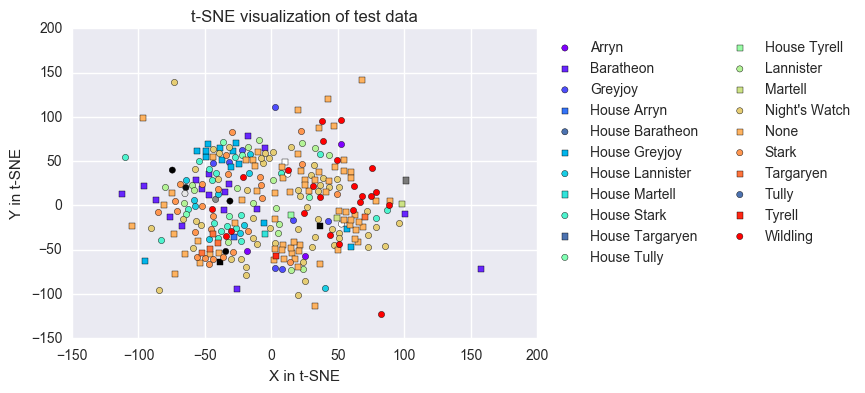

In [235]:
# Scatter Plot
plt.figure()

# Create color map for the 20 Allegiances and two different alternating markers
colors = cm.rainbow(np.linspace(0, 1, int((max(y)+1))))
markers = np.tile(['o','s'], 11)

# Fill Scatter Plot
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_2d[y==cl,0], y=x_2d[y==cl,1], c=colors[cl], marker=markers[idx], label=le.inverse_transform(cl))

# Labels and Legend
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='right', bbox_to_anchor=(1.7, 0.6), ncol=2)
plt.title('t-SNE visualization of test data')

plt.show()

## Conclusion

Witht the available data it is hard to infer a characters House. The character data in this dataset is not a good indicator of the House.